# 💎🙌  Superstonk Scraping DRS Computershare Posts 🚀 🦍 

## PushshiftAPI and JSON Web Scraping of Reddit 
### Used a combination of Pushshift API and JSON module 
### Reasons for my method:
- BeautifulSoup and Selenium
    - only able to scrape last two weeks of new post feed data 
- PRAW API
    - library only allows 1000 posts to fetched can't get historical data
- Pushshift API 
    - Server move in December only able to access post information until 11/3/2022
    - thus can not use OCR library to process image data
    - had to find comments made by a specific author and then scrape the appropiate data from each comment
- praw library only allows 1000 posts to fetched 



In [317]:
import pandas as pd
import numpy as np
import re
import requests #Pushshift accesses Reddit via an url so this is needed
import json #JSON manipulation
import csv #To Convert final table into a csv file to save to your machine
import datetime
import sys
from pmaw import PushshiftAPI
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

api = PushshiftAPI()

In [149]:
#Create your timestamps and queries for your search URL
goal_since = int(datetime.datetime(2021,1,1,0,0,0).timestamp()) #unix timestamp
since = int(datetime.datetime(2021,12,30,0,0,0).timestamp())    #unix timestamp
until = int(datetime.datetime(2021,12,31,0,0,0).timestamp())   #unix timestamp
sub = 'Superstonk'
author = "Roid_Rage_Smurf"
flair = "💻 Computershare"
query = " SHARES ADDED!"
print(f'since: {since} , until: {until}, goal: {goal_since}, author: {author}, query: {query}')
(since - goal_since)/86400

since: 1640818800 , until: 1640905200, goal: 1609455600, author: Roid_Rage_Smurf, query:  SHARES ADDED!


363.0

In [150]:
def getPushshiftData(since, until, goal_since, sub,query, author):
    df = pd.DataFrame(columns=['utc_datetime', 'permalink', 'shares_added'])
    while since != goal_since:
        #Build URL
        url = 'https://api.pushshift.io/reddit/search/comment/?&size=1000&since='+str(since)+'&until='+str(until)+'&subreddit='+str(sub)+'&author='+str(author)+'&q='+str(query)
        r = requests.get(url)
        try:
            #Load JSON data from webpage into data variable
            data = json.loads(r.text)
            for item in data['data']:
                utc_datetime = item['utc_datetime_str']
                permalink = 'https://www.reddit.com'+ item['permalink']
                body = item['body']
                match = re.search(r"\d+ SHARES", body)
                if match:
                    shares_added = match.group(0)
                    df = pd.concat([df, pd.DataFrame({'utc_datetime': [utc_datetime], 
                                                     'permalink': [permalink], 
                                                     'shares_added': [shares_added]})],
                                                       ignore_index=True)
            #adjusting for each day (24hrs) 
            since -= 86400
            until -= 86400
            print(since)
            print(f'NO ERROR - since: {since}, length: {len(df)}')
        except json.JSONDecodeError:
            print("Error Occurred, data up to this point has been stored")
            break
    print('Data has been loaded')
    return df 


In [151]:
temp_df = getPushshiftData(since, until, goal_since, sub,query, author)

1640732400
NO ERROR - since: 1640732400, length: 94
1640646000
NO ERROR - since: 1640646000, length: 176
1640559600
NO ERROR - since: 1640559600, length: 275
1640473200
NO ERROR - since: 1640473200, length: 340
1640386800
NO ERROR - since: 1640386800, length: 368
1640300400
NO ERROR - since: 1640300400, length: 390
1640214000
NO ERROR - since: 1640214000, length: 472
1640127600
NO ERROR - since: 1640127600, length: 606
1640041200
NO ERROR - since: 1640041200, length: 812
1639954800
NO ERROR - since: 1639954800, length: 951
1639868400
NO ERROR - since: 1639868400, length: 1053
1639782000
NO ERROR - since: 1639782000, length: 1115
1639695600
NO ERROR - since: 1639695600, length: 1190
1639609200
NO ERROR - since: 1639609200, length: 1377
1639522800
NO ERROR - since: 1639522800, length: 1531
1639436400
NO ERROR - since: 1639436400, length: 1657
1639350000
NO ERROR - since: 1639350000, length: 1824
1639263600
NO ERROR - since: 1639263600, length: 1959
1639177200
NO ERROR - since: 1639177200

In [158]:
# list of dataframes
'''
stonk_dec_to_oct_22
stonk_feb_to_jan_22
stonk_dec_22
stonk_nov_to_jan_22
'''

'\nstonk_dec_to_oct_22\nstonk_feb_to_jan_22\nstonk_dec_22\nstonk_nov_to_jan_22\n'

In [185]:
drs_df = pd.concat([stonk_dec_to_oct_22,stonk_feb_to_jan_22, stonk_dec_22, stonk_nov_to_jan_22])
drs_df

,utc_datetime,permalink,shares_added
0,2021-12-30 22:59:59,https://www.reddit.com/r/Superstonk/comments/r...,127 SHARES
1,2021-12-30 22:50:15,https://www.reddit.com/r/Superstonk/comments/r...,770 SHARES
2,2021-12-30 22:43:28,https://www.reddit.com/r/Superstonk/comments/r...,1165 SHARES
3,2021-12-30 22:41:17,https://www.reddit.com/r/Superstonk/comments/r...,58 SHARES
4,2021-12-30 21:54:40,https://www.reddit.com/r/Superstonk/comments/r...,2 SHARES
...,...,...,...
20971,2022-01-02 01:20:31,https://www.reddit.com/r/Superstonk/comments/r...,213 SHARES
20972,2022-01-02 01:04:28,https://www.reddit.com/r/Superstonk/comments/r...,21 SHARES
20973,2022-01-02 00:32:15,https://www.reddit.com/r/Superstonk/comments/r...,274 SHARES
20974,2022-01-02 00:25:14,https://www.reddit.com/r/Superstonk/comments/r...,32 SHARES


In [157]:
drs_df.to_csv('drs_df.csv',index=False)

In [172]:
#drs_df['utc_datetime']= pd.to_datetime(drs_df['utc_datetime'])

In [187]:
drs_df.shares_added = drs_df.shares_added.str.replace(' SHARES','')

In [188]:
drs_df.shares_added = drs_df.shares_added.astype(float)

In [190]:
drs_df[['post_date', 'post_time']] = drs_df['utc_datetime'].str.split(" ", expand=True)

In [193]:
drs_df['post_date'] = pd.to_datetime(drs_df['post_date'])
drs_df['post_time'] = pd.to_datetime(drs_df['post_time'], format='%H:%M:%S').dt.time

In [195]:
drs_df = drs_df.drop(['utc_datetime'], axis=1)

In [217]:
drs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31923 entries, 0 to 20975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   permalink     31923 non-null  object        
 1   shares_added  31923 non-null  float64       
 2   post_date     31923 non-null  datetime64[ns]
 3   post_time     31923 non-null  object        
 4   share_group   31923 non-null  object        
 5   day_of_week   31923 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.7+ MB


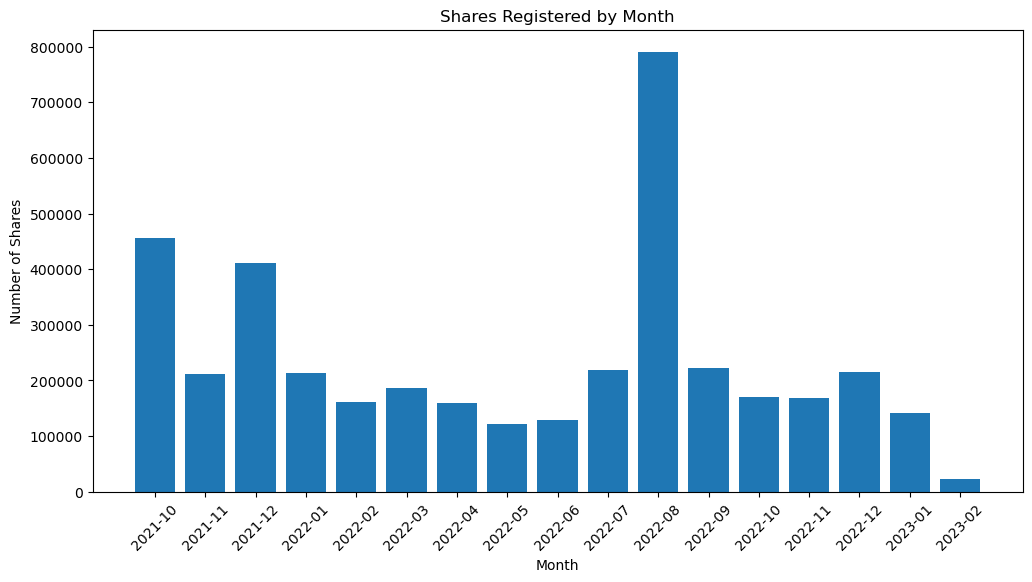

In [244]:
grouped_df = drs_df.groupby(drs_df['post_date'].dt.strftime('%Y-%m'))['shares_added'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
plt.bar(grouped_df['post_date'], grouped_df['shares_added'])
plt.xlabel('Month')
plt.ylabel('Number of Shares')
plt.title('Shares Registered by Month')
plt.xticks(rotation=45)
plt.show()
fig.savefig('shares_registered_by_Month.png')

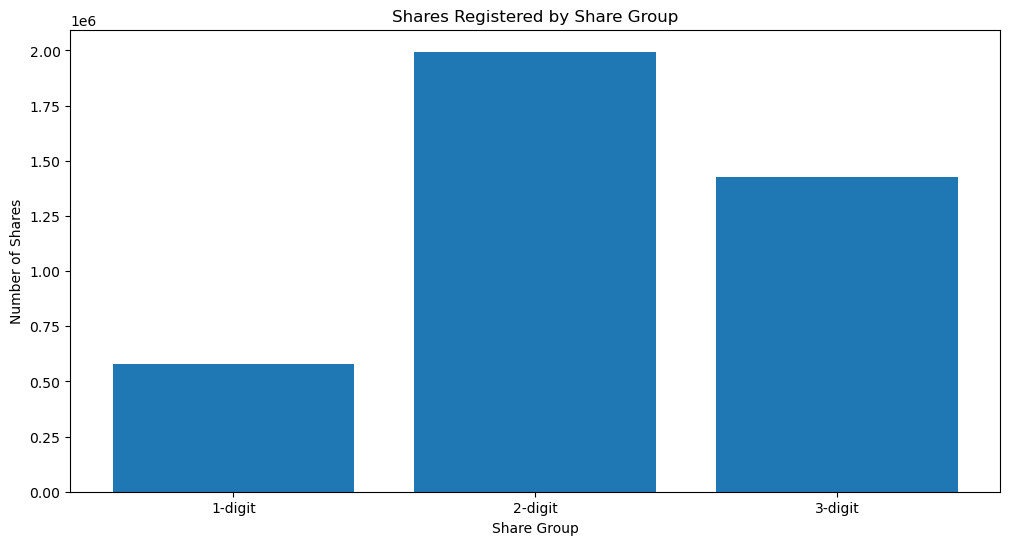

In [242]:
def categorize_shares(shares):
    if shares < 100:
        return '1-digit'
    elif shares < 1000:
        return '2-digit'
    else:
        return '3-digit'
fig, ax = plt.subplots(figsize=(12,6))

# Apply the categorize_shares function to the shares column
drs_df['share_group'] = drs_df['shares_added'].apply(categorize_shares)

# Group the data by share_group and calculate the total shares for each group
grouped_df = drs_df.groupby('share_group')['shares_added'].sum().reset_index()

# Plot the grouped data
plt.bar(grouped_df['share_group'], grouped_df['shares_added'])
plt.xlabel('Share Group')
plt.ylabel('Number of Shares')
plt.title('Shares Registered by Share Group')
plt.show()
fig.savefig('shares_registered_by_share_group.pdf')

In [221]:
drs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31923 entries, 0 to 20975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   permalink     31923 non-null  object        
 1   shares_added  31923 non-null  float64       
 2   post_date     31923 non-null  datetime64[ns]
 3   post_time     31923 non-null  object        
 4   share_group   31923 non-null  object        
 5   day_of_week   31923 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.7+ MB


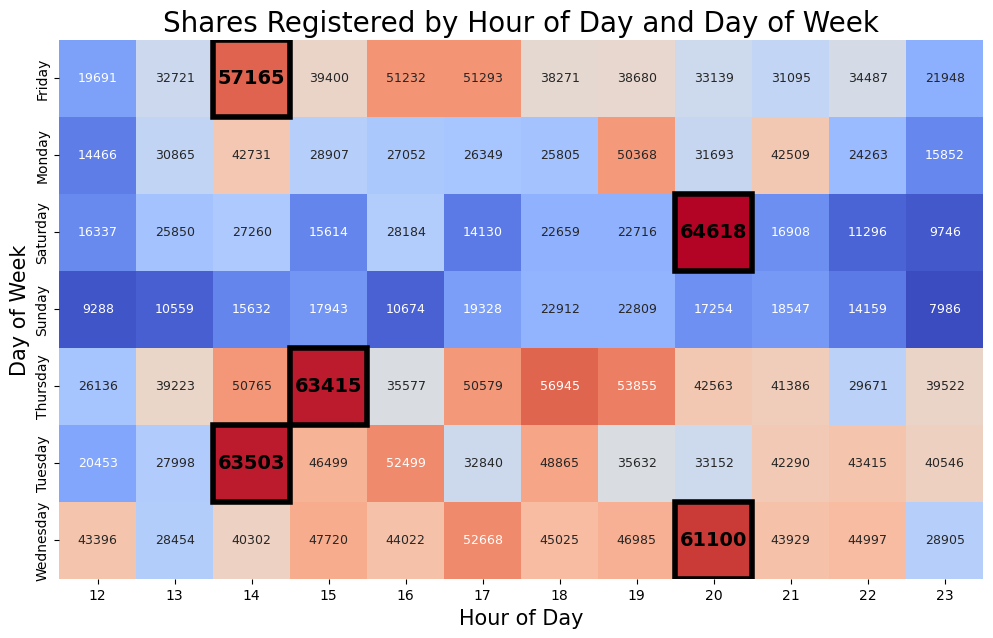

In [ ]:
# Convert the post_date column to datetime format
drs_df['post_date'] = pd.to_datetime(drs_df['post_date'])

# Convert the post_time column to datetime format
drs_df['post_time'] = pd.to_datetime(drs_df['post_time'], format='%H:%M:%S')

# Create a new column for the day of the week
drs_df['day_of_week'] = drs_df['post_date'].dt.day_name()

# Create a new column for the hour of the day
drs_df['hour_of_day'] = drs_df['post_time'].dt.hour.astype(int)

# Filter the data to include only hours after 12:00
grouped_df = drs_df.loc[drs_df['hour_of_day'] >= 12].groupby(['day_of_week', 'hour_of_day'])['shares_added'].sum().reset_index()

# Pivot the data to create a heatmap
heatmap_df = grouped_df.pivot("day_of_week", "hour_of_day", "shares_added")

# Define a custom function for annotating values
def format_func(value):
    if value > 57000:
        return "%.0f" % value
    else:
        return "%.0f" % value

# Plot the heatmap
plt.figure(figsize=(16, 7))
ax = sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt='', annot_kws={'size': 9, 'ha': 'center', 'va': 'center'}, cbar=False, mask=heatmap_df.isnull(), square=True, cbar_kws={'shrink': 0.5})

# Apply the custom function to the 'annot' parameter
for text in ax.texts:
    value = float(text.get_text())
    if value > 57000:
        text.set_text(format_func(value))
        text.set_fontweight('bold')
        text.set_color('black')
        text.set_fontsize(14)
    else:
        text.set_text(format_func(value))

plt.xlabel('Hour of Day', fontdict={'fontsize':15})
plt.ylabel('Day of Week', fontdict={'fontsize':15})
plt.title('Shares Registered by Hour of Day and Day of Week', fontdict={'fontsize':20})

# Add Black boxes around values over 57000
for i in range(heatmap_df.shape[0]):
    for j in range(heatmap_df.shape[1]):
        if heatmap_df.iloc[i, j] > 57000:
            rect = patches.Rectangle((j, i), 1, 1, linewidth=4, edgecolor='black', facecolor='none')
            ax.add_patch(rect)

# Save the figure as a PNG image
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

plt.show()
